# Response functions
This notebook provides an overview of the response functions that are available in Pastas. Response functions describe the response of the dependent variable (an `oseries` like groundwater heads) to an independent variable (a stress like precipitation or groundwater pumping) and form a fundamental part in approach implemented in Pastas. Depending on the problem under investigation, a response function may be required with a certain shape or with more degrees of freedom (parameters). Response function are generally used in combination with a stress model, but in this notebook the response functions are discussed independently to provide an overview of the different response functions and what they represent.

In [5]:
import numpy as np
import pandas as pd
import pastas as ps
import matplotlib.pyplot as plt

ps.show_versions()

Python version: 3.9.13
NumPy version: 1.21.5
Pandas version: 1.4.4
SciPy version: 1.9.1
Matplotlib version: 3.5.2
Numba version: 0.55.1
LMfit version: Not Installed
Latexify version: 0.2.0
Pastas version: 1.0.0b


## Response functions available in Pastas
The following response functions are available in Pastas:

### Exponential response function
The exponential response function is the simplest response function with only two parameters: a scaling parameter $A$ and a shape parameter $a$. The response function may be used for stresses that start to have an immediate effect on the head, for example precipitation in a shallow aquifer. The step response function plateaus at $A$. 
The equation for the impulse response is:

In [6]:
ps.Exponential.impulse

## Gamma response function
The gamma response function is slightly more complicated than the exponential response function and has an additional shape parameter $n$. When $n>1$, there is a delay in the response. When $n=1$, the Gamma response is the same as the Exponential response. When $n<1$ there is an immediate response. The response function is the most used response function in Pastas, as its shape is versitile and  for stresses that start to have an immediate effect on the head, for example precipitation in a shallow aquifer. The step response plateaus at $A$. The equation for the impulse reponse is:

## Response functions available in Pastas
Depending on the stress type (e.g., recharge, river levels or groundwater pumping) different response function may be used. All response functions that are tested and supported in Pastas are summarized in the table below for reference. The equation in the third column is the formula for the impulse response function ($\theta(t)$).

| Name             | Fitting parameters  | Formula                                                                 | Description                                                                    |
|------------------|-------------|:------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| FourParam | 4 - A, n, a, b | $$ \theta(t) = A \frac{t^{n-1}}{a^n \Gamma \left(n \right)} e^{-t/a- ab/t} $$ | Response function with four parameters that may be used for many purposes. Many other response function are a simplification of this function. |
| Gamma |3 - A, a, n | $$ \theta(t) = A \frac{t^{n-1}}{a^n \Gamma \left(n \right)} e^{-t/a} $$ | Three parameter version of FourParam, used for all sorts of stresses ($b=0$) |
| Exponential | 2 - A, a | $$ \theta(t) = \frac{A}{a} e^{-t/a} $$ | Response function that can be used for stresses that have an (almost) instant effect. ($n=1$ and $b=0$) |
| Hantush | 3 - A, a, b | $$ \theta(t) = \frac{A}{2t \text{K}_0 \left(2 \sqrt{b} \right)} e^{-t/a - ab/t} $$ | Response function commonly used for groundwater extraction wells ($n=0$) |
| Polder | 3 - a, b, c | $$ \theta(t) = At^{-3/2} e^{-t/a -b/t} $$ | Response function commonly used to simulate the effects of (river) water levels on the groundwater levels ($n=-1/2$) |
| DoubleExponential | 4 - A, $\alpha$, $a_1$, $a_2$ | $$ \theta(t) = A \left(1 - \alpha \right) e^{-t/a_1} + A \alpha e^{-t/a_2} $$ | Response Function with a double exponential, simulating a fast and slow response. |
| Edelman | 1 - $\beta$ | $$ \theta(t) = \text{?} $$ | The function of Edelman, describing the propagation of an instantaneous water level change into an adjacent half-infinite aquifer. | 
| HantushWellModel | 3 - $A^\prime$, a, $b^\prime$ | $$ \theta(r,t) = \frac{A^\prime}{2t} e^{-t/a - a r^2 \exp(b^\prime) /t} $$ | A special implementation of the Hantush well function for multiple wells. |

Below the different response functions are plotted.

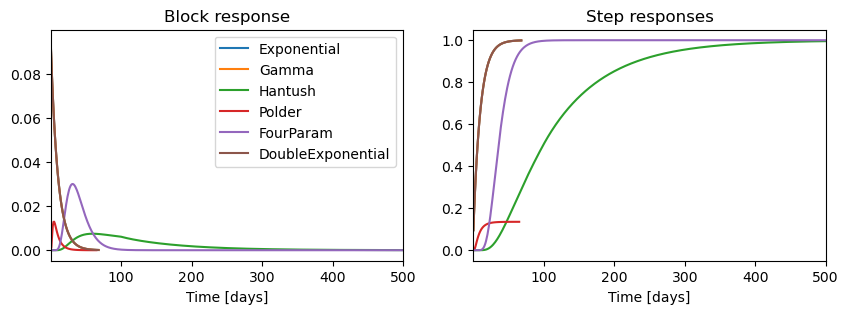

In [7]:
# Default Settings
cutoff = 0.999
gain_scale_factor = 1
up = True

responses = {}
exp = ps.Exponential()
responses["Exponential"] = exp

gamma = ps.Gamma()
responses["Gamma"] = gamma

hantush = ps.Hantush()
responses["Hantush"] = hantush

polder = ps.Polder()
responses["Polder"] = polder

fourp = ps.FourParam()
responses["FourParam"] = fourp

DoubleExp = ps.DoubleExponential()
responses["DoubleExponential"] = DoubleExp

parameters = pd.DataFrame()

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, figsize=(10, 3))

for name, response in responses.items():
    p = response.get_init_parameters(name)
    parameters = pd.concat([parameters, p], axis=0)
    ax1.plot(response.block(p.initial), label=name)
    ax2.plot(response.step(p.initial), label=name)

ax1.set_title("Block response")
ax2.set_title("Step responses")
ax1.set_xlabel("Time [days]")
ax2.set_xlabel("Time [days]")
ax1.legend()
plt.xlim(1e-1, 500)
plt.show()

In [41]:
p

,initial,pmin,pmax,vary,name
Polder_A,1,0.000000,2,True,Polder
Polder_a,10,0.010000,1000,True,Polder
Polder_b,1,0.000001,25,True,Polder


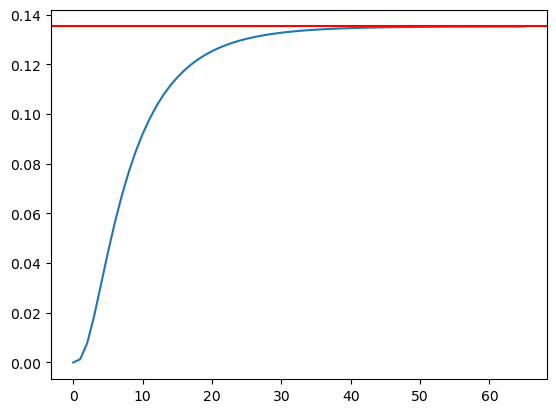

In [45]:
name = 'Polder'
response = responses[name]
p = response.get_init_parameters(name)
#parameters = pd.concat([parameters, p], axis=0)
plt.plot(response.step(p.initial))
b = p.loc['Polder_b', 'initial']
plt.axhline(np.exp(-2 * np.sqrt(b)), color='r')

### Scaling of the step response functions
An important characteristic is the so-called "gain" of a response function. The gain is the final increase or decrease that results from a unit increase or decrease in a stress that continues infinitely in time (e.g., pumping at a constant rate forever). This can be visually inspected by the value of the step response function for large values of $t$ but can also be inferred from the parameters as follows:

- The FourParam, Gamma, Exponential, and Hantush step functions are scaled such that the gain equals $A$
- The Polder function is scaled such that the gain equals $\exp\left(-2\sqrt{b}\right)$
- The gain of the Edelman function always equals 1, but this will take an infinite amount of time.

## Comparison of the different response functions
The `Gamma`, `Exponential`, `Polder`, and `Hantush` response function can all be derived from the more general `FourParam` response function by fixing the parameters $n$ and/or $b$ to a specific value. The `DoubleExponential`, `Edelman`, and `HantushWellModel` cannot be written as some form of the `FourParam` function. Below the response function that are special forms of the four parameter function are are shown for different values of $n$ and $b$.

In [ ]:
A = 1
a = 50
b = 0.4
plt.figure(figsize=(16, 8))
for i, n in enumerate([-0.5, 1e-6, 0.5, 1, 1.5]):
    plt.subplot(2, 3, i + 1)
    plt.title(f"n={n:0.1f}")
    fp = fourp.step([A, n, a, b], dt=1, cutoff=0.95)
    plt.plot(np.arange(1, len(fp) + 1), fp, "C0", label="4-param")
    e = exp.step([A, a], dt=1, cutoff=0.95)
    plt.plot(np.arange(1, len(e) + 1), e, "C1", label="exp")
    if n > 0:
        g = gamma.step([A, n, a], dt=1, cutoff=0.95)
        plt.plot(np.arange(1, len(g) + 1), g, "C2", label="gamma")
    h = hantush.step([A, a, b], dt=1, cutoff=0.95) / hantush.gain([A, a, b])
    plt.plot(np.arange(1, len(h) + 1), h, "C3", label="hantush")
    p = polder.step([A, a, b], dt=1, cutoff=0.95) / polder.gain([A, a, b])
    plt.plot(np.arange(1, len(p) + 1), p, "C4", label="polder")
    plt.xlim(0, 200)
    plt.legend()
    if n > 0:
        print("fp, e, g, h, p:", fp[-1], e[-1], g[-1], h[-1], p[-1])
    else:
        print("fp, e, h, p:", fp[-1], e[-1], h[-1], p[-1])
    plt.axhline(0.95, linestyle=":", label="95\% cutoff")

## Parameter settings
- **up** : This parameters determines whether the influence of the stress goes up or down, hence a positive or a negative response function. For example, when groundwater pumping is defined as a positive flux, `up=False` because we want the groundwater levels to decrease as a result of pumping.
- **gain_scale_factor** : This parameter is used to estimate the initial value of the stationary effect of a stress. Hence the effect when a stress stays at an unit level for infinite amount of time. This parameter is usually referred from the stress time series and does not have to be provided by the user.
- **cutoff** : This parameter determines for how many time steps the response is calculated. This reduces calculation times as it reduces the length of the array the stress is convolved with. The default value is 0.999, meaning that the response is cutoff after 99.9% of the effect of the stress impulse has occurred. A minimum of length of three times the simulation time step is applied. 

The default parameter values for each of the response function are as follows:

In [ ]:
parameters